# Exploring Ebay Car Sales Data

Here we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifields section of the German eBay website. The purpose here is to clean the data and run some simple analysis.

#### Notes

* Sample of 50,000 datapoints from full dataset.
* Dataset is slightly messier than original dataset.

#### Columns
* **dateCrawled** - When this ad was first crawled.
* **name** - Name of the car.
* **seller** - Whether the seller is private or a dealer.
* **offerType** - The type of listing
* **price** - The price on the ad to sell the car.
* **abtest** - Whether the listing is included in an A/B test.
* **vehicleType** - The vehicle Type.
* **yearOfRegistration** - The year in which the car was first registered.
* **gearbox** - The transmission type.
* **powerPS** - The power of the car in PS.
* **model** - The car model name.
* **kilometer** - How many kilometers the car has driven.
* **monthOfRegistration** - The month in which the car was first registered.
* **fuelType** - What type of fuel the car uses.
* **brand** - The brand of the car.
* **notRepairedDamage** - If the car has a damage which is not yet repaired.
* **dateCreated** - The date on which the eBay listing was created.
* **nrOfPictures** - The number of pictures in the ad.
* **postalCode** - The postal code for the location of the vehicle.
* **lastSeenOnline** - When the crawler saw this ad last online.


In [1]:
import pandas as pd

import numpy as np

In [2]:
autos = pd.read_csv("autos.csv", encoding="Latin-1")

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

#### Some Observations

From observing intial info, some columns, of a total of 20 appear to have Null or NaN values:

    * vehicleType
    * model
    * gearbox
    * fuelType
    * notRepairedDamage
  
    
Names given to columns are not always clear. Camelcase is also used.

Let's first change the columns from camelcase to snakecase, and reword some of them to be a bit more descriptive.

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
                   'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
                   'odometer', 'registration_month', 'fuel_type', 'brand',
                   'unreparied_damage', 'ad_created', 'no_of_pictures', 'postal_code',
                   'last_seen']

In [7]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unreparied_damage,ad_created,no_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Above, we ran **`df.columns`** to return an array of all columns in the dataframe. We then copied this array, assigned it back to **`df.columns`**, amending any column names where necessary

In [8]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unreparied_damage,ad_created,no_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-12 16:06:22,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


From running **`df.describe()`** there are a few initial observations:

* Some columns have mostly the same value for each record: `seller` and `offer_type`. These can perhaps be dropped.

* `price` and `odometer` columns are text columns, due to the inclusion of certain non-numeric characters. These could be adjusted.

* `no_of_pictures` appears to just be NaN, Zero values.

* Columns involving dates and times could be split up by data and time, and coverted to datetime datatypes.

* Some columns look to have wrongly inputted data. For example, `registration_year` has a minimum value of 1000, and a maximum of 9999.

* `gearbox` has spelling errors.

Let's first remove the non-numeric values from `price` and `odometer`, convert to a numeric type, and rename the columns to be more descriptive.




In [9]:
autos['price'] = autos['price'].str.replace('$', '').str.replace(',', '')
autos['odometer'] = autos['odometer'].str.replace('km', '').str.replace(',', '')

In [10]:
autos['price'] = autos['price'].astype(float)
autos['odometer'] = autos['odometer'].astype(float)

In [11]:
autos.rename({'odometer' : 'odometer_km'}, axis = 1, inplace = True)

Now that we've cleaned these columns up a bit, let us explore them a bit deeper

In [12]:
len(autos['odometer_km'].unique()) # Unique Values

13

In [13]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [14]:
autos['odometer_km'].value_counts().sort_index(ascending = True).head(10)

5000.0      967
10000.0     264
20000.0     784
30000.0     789
40000.0     819
50000.0    1027
60000.0    1164
70000.0    1230
80000.0    1436
90000.0    1757
Name: odometer_km, dtype: int64

In [15]:
autos['odometer_km'].value_counts().sort_index(ascending = False).head(10)

150000.0    32424
125000.0     5170
100000.0     2169
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1027
40000.0       819
30000.0       789
Name: odometer_km, dtype: int64

Based ont he above observations, there does not appear to be any outliers within the `odometer_km` column.

In [16]:
len(autos['price'].unique()) # Unique Values

2357

In [17]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [18]:
autos['price'].value_counts().sort_index(ascending = True).head(10)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
Name: price, dtype: int64

In [19]:
autos['price'].value_counts().sort_index(ascending = False).head(10)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
Name: price, dtype: int64

Based on the above, the `price` column may have some outliers. One car has a price of 99,999,999, and another with a price of 27,322,222.

Currently, the most expensive car in the world is around 18,000,000.

In [20]:
autos[autos['price'] > 20000000]

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unreparied_damage,ad_created,no_of_pictures,postal_code,last_seen
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,privat,Angebot,99999999.0,control,limousine,1999,automatik,224,s_klasse,150000.0,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,0,73525,2016-04-06 05:15:30
42221,2016-03-08 20:39:05,Leasinguebernahme,privat,Angebot,27322222.0,control,limousine,2014,manuell,163,c4,40000.0,2,diesel,citroen,NaN,2016-03-08 00:00:00,0,76532,2016-03-08 20:39:05


Further analysis reveals the cars to be limousines. It's unclear exactly why these cars are so expenisive. We will therefore remove them from the dataset.

In [21]:
autos.drop([39705, 42221], inplace = True)

In [22]:
autos['price'].value_counts().sort_index(ascending = False).head(10)

12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
Name: price, dtype: int64

There are still some questionably expensive cars. However we will leave these for now.

In [23]:
autos['price'].value_counts().sort_index(ascending = True).head(10)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
Name: price, dtype: int64

We can also note that some cars are worth very little.

In [24]:
autos[autos['price'] < 10].sort_values(by = 'price').head(5)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unreparied_damage,ad_created,no_of_pictures,postal_code,last_seen
27,2016-03-27 18:45:01,Hat_einer_Ahnung_mit_Ford_Galaxy_HILFE,privat,Angebot,0.0,control,NaN,2005,NaN,0,NaN,150000.0,0,NaN,ford,NaN,2016-03-27 00:00:00,0,66701,2016-03-27 18:45:01
32072,2016-03-08 17:53:48,Suche_3_Golf_GTi,privat,Angebot,0.0,control,kleinwagen,1990,NaN,0,golf,150000.0,0,NaN,volkswagen,NaN,2016-03-08 00:00:00,0,2733,2016-04-05 06:18:19
32042,2016-03-14 08:55:18,VERSCHENKE_DEN_REST_DES_BMW_e39_mit_Kfz_Brief,privat,Angebot,0.0,test,kombi,1998,NaN,150,NaN,150000.0,8,NaN,bmw,ja,2016-03-14 00:00:00,0,49699,2016-03-14 09:46:47
32029,2016-03-15 13:46:32,Achtung_Tausche_BMW_E36_Automatic_1_8_Nur_Taus...,privat,Angebot,0.0,control,limousine,1994,automatik,0,3er,150000.0,12,benzin,bmw,nein,2016-03-15 00:00:00,0,3042,2016-03-21 09:47:28
32024,2016-03-23 10:58:34,Opel_Corsa,privat,Angebot,0.0,control,kleinwagen,1999,manuell,0,corsa,150000.0,2,benzin,opel,NaN,2016-03-23 00:00:00,0,89597,2016-04-01 14:17:35


It's unclear why some cars are worth so little, with many being worth nothing. We'll leave these for now, as there are cases of sellers giving away cars for free on Ebay. In reality, we might want to explore this further.

Let's move on to examining the data columns.

In [25]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49998 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date_crawled        49998 non-null  object 
 1   name                49998 non-null  object 
 2   seller              49998 non-null  object 
 3   offer_type          49998 non-null  object 
 4   price               49998 non-null  float64
 5   abtest              49998 non-null  object 
 6   vehicle_type        44903 non-null  object 
 7   registration_year   49998 non-null  int64  
 8   gearbox             47318 non-null  object 
 9   power_ps            49998 non-null  int64  
 10  model               47240 non-null  object 
 11  odometer_km         49998 non-null  float64
 12  registration_month  49998 non-null  int64  
 13  fuel_type           45516 non-null  object 
 14  brand               49998 non-null  object 
 15  unreparied_damage   40171 non-null  object 
 16  ad_c

Three of the date columns appear to be represented as strings.

In [26]:
autos[['date_crawled', 'ad_created', 'last_seen']].head(5)

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


From these columns, the format is

* `year-month-day`
* `hour:minute:second`

In [27]:
autos['date_crawled'].str[:10].head()

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: date_crawled, dtype: object

In [28]:
(autos['date_crawled'].str[:10].value_counts(normalize = True, dropna = False) * 100).sort_index().round(2) 

2016-03-05    2.54
2016-03-06    1.39
2016-03-07    3.60
2016-03-08    3.33
2016-03-09    3.32
2016-03-10    3.21
2016-03-11    3.25
2016-03-12    3.68
2016-03-13    1.56
2016-03-14    3.66
2016-03-15    3.40
2016-03-16    2.95
2016-03-17    3.15
2016-03-18    1.31
2016-03-19    3.49
2016-03-20    3.78
2016-03-21    3.75
2016-03-22    3.29
2016-03-23    3.24
2016-03-24    2.91
2016-03-25    3.17
2016-03-26    3.25
2016-03-27    3.10
2016-03-28    3.48
2016-03-29    3.42
2016-03-30    3.36
2016-03-31    3.19
2016-04-01    3.38
2016-04-02    3.54
2016-04-03    3.87
2016-04-04    3.65
2016-04-05    1.31
2016-04-06    0.32
2016-04-07    0.14
Name: date_crawled, dtype: float64

From initial analysis, we can observe that the highest distribution of values was for date:

* `03-04-2016`

With the lowest for:

* `07-04-2016`

It's interesting that these are so close together. Data was gathered over a month period.

In [29]:
ad_created_percent = (autos['ad_created'].str[:10].value_counts(normalize = True, dropna = False) * 100).round(2) 

In [30]:
ad_created_percent.describe()

count    76.000000
mean      1.314868
std       1.596122
min       0.000000
25%       0.000000
50%       0.015000
75%       3.230000
max       3.890000
Name: ad_created, dtype: float64

In [31]:
ad_created_percent.sort_index(ascending = True)

2015-06-11    0.00
2015-08-10    0.00
2015-09-09    0.00
2015-11-10    0.00
2015-12-05    0.00
              ... 
2016-04-03    3.89
2016-04-04    3.69
2016-04-05    1.18
2016-04-06    0.33
2016-04-07    0.13
Name: ad_created, Length: 76, dtype: float64

There were a number of dates where ads were created, with some dates having zero ads. It's appears ads were more frequent from March 2016 onwards, with very few ads before this point. 

It's not entirely clear why this is. From some research, it appears cars are less likely to be sold during the winter months, with consumers unwilling to brave the cold conditions to purchase a new vehicle. Thus it may make more sense to wait until this winter period is over before trying to sell one's car.

In [32]:
last_seen_percent = (autos['last_seen'].str[:10].value_counts(normalize = True, dropna = False) * 100).round(2) 

In [33]:
last_seen_percent.sort_values()

2016-03-05     0.11
2016-03-06     0.44
2016-03-07     0.54
2016-03-18     0.74
2016-03-08     0.76
2016-03-13     0.90
2016-03-09     0.99
2016-03-10     1.08
2016-03-11     1.25
2016-03-14     1.28
2016-03-19     1.57
2016-03-15     1.59
2016-03-27     1.60
2016-03-16     1.64
2016-03-26     1.70
2016-03-23     1.86
2016-03-25     1.92
2016-03-24     1.96
2016-03-21     2.07
2016-03-20     2.07
2016-03-28     2.09
2016-03-22     2.16
2016-03-29     2.23
2016-04-01     2.31
2016-03-12     2.38
2016-03-31     2.38
2016-04-04     2.46
2016-03-30     2.48
2016-04-02     2.49
2016-04-03     2.54
2016-03-17     2.79
2016-04-05    12.43
2016-04-07    13.09
2016-04-06    22.10
Name: last_seen, dtype: float64

In [34]:
last_seen_percent.describe()

count    34.000000
mean      2.941176
std       4.348196
min       0.110000
25%       1.257500
50%       1.940000
75%       2.380000
max      22.100000
Name: last_seen, dtype: float64

The previous findings line up with our previous conclusion. The frequency of ads last seen by the crawler appear to be mostly in April. With a lesser frequency in the earlier winter months.

In [35]:
autos['registration_year'].describe()

count    49998.000000
mean      2005.073223
std        105.714916
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

From analysing registration year, there appear to be some issues. Max year is 9999 (which is a long way off!). 

The average year a car is registered is around 2005 - although the outlier 9999 is likely to have thrown this off.

Should also note that the minimum year is 1000 (cars weren't even invented!)

Given when the data was collected, cars shouldn't be over 2016 as far as registration goes. The minimum year is harder to determine, but will assume that any car with a registration pre-1900 to be invalid.

In [36]:
invalid_reg = autos[(autos['registration_year'] < 1900) | (autos['registration_year'] > 2016)]

In [37]:
invalid_reg['registration_year'].describe()

count    1972.000000
mean     2060.353448
std       528.204087
min      1000.000000
25%      2017.000000
50%      2017.000000
75%      2018.000000
max      9999.000000
Name: registration_year, dtype: float64

In [38]:
autos['registration_year'].count()

49998

In [39]:
autos = autos[(autos['registration_year'] >= 1900) & (autos['registration_year'] <= 2016)]

In [40]:
autos['registration_year'].describe()

count    48026.000000
mean      2002.803357
std          7.310804
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

We can see that after removing the outliers and invalid data, the average registration year has dropped. The minimum year is now 1910, and the maximum is 2016. The standard deviation has also dropped substantially, suggesting that the invalid data was resulting in the data appearing far more spread out that it actually was.

In [41]:
(autos['registration_year'].value_counts(normalize=True) * 100).sort_values()

1952    0.002082
1931    0.002082
1953    0.002082
1943    0.002082
1948    0.002082
          ...   
2003    5.678174
2004    5.698996
1999    6.244534
2005    6.277849
2000    6.983717
Name: registration_year, Length: 78, dtype: float64

As we might expect, most vehicles registered are from around the beginning of the 21st century, with very few cars registered pre-2000.

Now let's take a closer look at the brands column. We'll start by aggregating the data anc calculating means.

In [42]:
autos["brand"].unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [43]:
unique_brands = autos['brand'].value_counts()
unique_brands.head()

volkswagen       10188
bmw               5284
opel              5195
mercedes_benz     4579
audi              4149
Name: brand, dtype: int64

For now, lets just analyse the top 5 most common brands. We'll examine price and mileage, and see if there's any correlation.

In [44]:
unique_brands = unique_brands.index[:5]

In [45]:
brand_price_means = dict()

for brand in unique_brands:
    mean = autos[autos['brand'] == brand]['price'].mean()
    brand_price_means[brand] = round(mean, 2)
    
sorted_price_means = sorted(brand_price_means.items(), key = lambda x : x[1])

for item in sorted_price_means:
    print("{:20s} : {}".format(item[0].capitalize(), item[1]))

Opel                 : 5252.62
Volkswagen           : 6516.46
Bmw                  : 8334.65
Mercedes_benz        : 8485.24
Audi                 : 9093.65


From analysing the top 5 most common brands, `Audi` is the most expensive, with an average price point of `9093` dollars. 

The cheapest is `Opel` at `5252` dollars.

In [46]:
unique_brands

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi'], dtype='object')

In [47]:
brand_mileage_means = dict()

for brand in unique_brands:
    mean = autos[autos['brand'] == brand]['odometer_km'].mean()
    brand_mileage_means[brand] = round(mean, 2)
    
sorted_mileage_means = sorted(brand_mileage_means.items(), key = lambda x : x[1])
sorted_mileage_means
brand_mileage_means

{'volkswagen': 128730.37,
 'bmw': 132434.71,
 'opel': 129227.14,
 'mercedes_benz': 130856.08,
 'audi': 129287.78}

In [48]:
mileage_series = pd.Series(brand_mileage_means, name = "mileage")
price_series = pd.Series(brand_price_means, name = "price")

mileage_price_df = pd.concat([mileage_series, price_series], axis = 1)
mileage_price_df.sort_values(by = ['price'])

,mileage,price
opel,129227.14,5252.62
volkswagen,128730.37,6516.46
bmw,132434.71,8334.65
mercedes_benz,130856.08,8485.24
audi,129287.78,9093.65


Let's do something different now. Let's translate the german words under gearbox, and map the values to their English counterparts!

In [49]:
autos.select_dtypes('object').columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'abtest',
       'vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand',
       'unreparied_damage', 'ad_created', 'last_seen'],
      dtype='object')

In [50]:
autos['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

There are currently on three values: nan, manuell, automatik. Let's convert manuell and automatik to English

In [51]:
translation_gearbox = {'manuell' : 'manual', 'automatik' : 'automatic'}

autos['gearbox'] = autos['gearbox'].map(translation_gearbox)

In [52]:
autos['gearbox']

0           manual
1        automatic
2           manual
3        automatic
4           manual
           ...    
49995    automatic
49996       manual
49997    automatic
49998       manual
49999       manual
Name: gearbox, Length: 48026, dtype: object

Now lets convert the `ad_created` column to uniform numeric and remove the time.

In [53]:
autos['ad_created'].head()

0    2016-03-26 00:00:00
1    2016-04-04 00:00:00
2    2016-03-26 00:00:00
3    2016-03-12 00:00:00
4    2016-04-01 00:00:00
Name: ad_created, dtype: object

In [54]:
autos['ad_created'] = autos['ad_created'].str.split(expand = True)[0]
autos['ad_created'].head()

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: ad_created, dtype: object

In [55]:
autos['ad_created'] = autos['ad_created'].str.replace("-", "")
autos['ad_created'].head()

0    20160326
1    20160404
2    20160326
3    20160312
4    20160401
Name: ad_created, dtype: object

From further browsing the data, it looks as though in the `name` column, the first value before the dash is the brand, and everything following relates to the specific type of car. Let's seperate that into a new column.

In [56]:
autos.head(5)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unreparied_damage,ad_created,no_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000.0,control,bus,2004,manual,158,andere,150000.0,3,lpg,peugeot,nein,20160326,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500.0,control,limousine,1997,automatic,286,7er,150000.0,6,benzin,bmw,nein,20160404,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,limousine,2009,manual,102,golf,70000.0,7,benzin,volkswagen,nein,20160326,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350.0,control,kleinwagen,2007,automatic,71,fortwo,70000.0,6,benzin,smart,nein,20160312,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350.0,test,kombi,2003,manual,0,focus,150000.0,7,benzin,ford,nein,20160401,0,39218,2016-04-01 14:38:50


In [62]:
split = autos['name'].str.split("_", n = 2, expand = True)
split[1]

0           807
1          740i
2          Golf
3         smart
4         Focus
          ...  
49995        Q5
49996     Astra
49997       500
49998        A3
49999    Vectra
Name: 1, Length: 48026, dtype: object

In [67]:
autos['model'] = split[1]
autos['name'] = split[0]
autos['description'] = split[2]
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,...,odometer_km,registration_month,fuel_type,brand,unreparied_damage,ad_created,no_of_pictures,postal_code,last_seen,description
0,2016-03-26 17:47:46,Peugeot,privat,Angebot,5000.0,control,bus,2004,manual,158,...,150000.0,3,lpg,peugeot,nein,20160326,0,79588,2016-04-06 06:45:54,160_NAVTECH_ON_BOARD
1,2016-04-04 13:38:56,BMW,privat,Angebot,8500.0,control,limousine,1997,automatic,286,...,150000.0,6,benzin,bmw,nein,20160404,0,71034,2016-04-06 14:45:08,4_4_Liter_HAMANN_UMBAU_Mega_Optik
2,2016-03-26 18:57:24,Volkswagen,privat,Angebot,8990.0,test,limousine,2009,manual,102,...,70000.0,7,benzin,volkswagen,nein,20160326,0,35394,2016-04-06 20:15:37,1.6_United
3,2016-03-12 16:58:10,Smart,privat,Angebot,4350.0,control,kleinwagen,2007,automatic,71,...,70000.0,6,benzin,smart,nein,20160312,0,33729,2016-03-15 03:16:28,fortwo_coupe_softouch/F1/Klima/Panorama
4,2016-04-01 14:38:50,Ford,privat,Angebot,1350.0,test,kombi,2003,manual,0,...,150000.0,7,benzin,ford,nein,20160401,0,39218,2016-04-01 14:38:50,1_6_Benzin_TÜV_neu_ist_sehr_gepflegt.mit_Klima...


Let's rearrage:

In [68]:
cols = autos.columns.tolist()
cols

['date_crawled',
 'name',
 'seller',
 'offer_type',
 'price',
 'abtest',
 'vehicle_type',
 'registration_year',
 'gearbox',
 'power_ps',
 'model',
 'odometer_km',
 'registration_month',
 'fuel_type',
 'brand',
 'unreparied_damage',
 'ad_created',
 'no_of_pictures',
 'postal_code',
 'last_seen',
 'description']

In [69]:
ordering = list(range(len(cols)))
ordering

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [70]:
new_ordering = [0, 1, 10, 20, 4, 5, 6, 7, 8, 9, 3, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2]

cols = [cols[i] for i in new_ordering]
cols

['date_crawled',
 'name',
 'model',
 'description',
 'price',
 'abtest',
 'vehicle_type',
 'registration_year',
 'gearbox',
 'power_ps',
 'offer_type',
 'odometer_km',
 'registration_month',
 'fuel_type',
 'brand',
 'unreparied_damage',
 'ad_created',
 'no_of_pictures',
 'postal_code',
 'last_seen',
 'seller']

In [71]:
autos = autos[cols]

In [72]:
autos.head()

,date_crawled,name,model,description,price,abtest,vehicle_type,registration_year,gearbox,power_ps,...,odometer_km,registration_month,fuel_type,brand,unreparied_damage,ad_created,no_of_pictures,postal_code,last_seen,seller
0,2016-03-26 17:47:46,Peugeot,807,160_NAVTECH_ON_BOARD,5000.0,control,bus,2004,manual,158,...,150000.0,3,lpg,peugeot,nein,20160326,0,79588,2016-04-06 06:45:54,privat
1,2016-04-04 13:38:56,BMW,740i,4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatic,286,...,150000.0,6,benzin,bmw,nein,20160404,0,71034,2016-04-06 14:45:08,privat
2,2016-03-26 18:57:24,Volkswagen,Golf,1.6_United,8990.0,test,limousine,2009,manual,102,...,70000.0,7,benzin,volkswagen,nein,20160326,0,35394,2016-04-06 20:15:37,privat
3,2016-03-12 16:58:10,Smart,smart,fortwo_coupe_softouch/F1/Klima/Panorama,4350.0,control,kleinwagen,2007,automatic,71,...,70000.0,6,benzin,smart,nein,20160312,0,33729,2016-03-15 03:16:28,privat
4,2016-04-01 14:38:50,Ford,Focus,1_6_Benzin_TÜV_neu_ist_sehr_gepflegt.mit_Klima...,1350.0,test,kombi,2003,manual,0,...,150000.0,7,benzin,ford,nein,20160401,0,39218,2016-04-01 14:38:50,privat


Now let's find the most common brand / model combinations. We'll only find the 5 most common brand-model combos.

In [80]:
name_model = autos['name'] + "_" + autos['model']
name_model.value_counts().head()

Mercedes_Benz      3171
Volkswagen_Golf    1824
Opel_Corsa         1221
Opel_Astra         1089
Audi_A4            1026
dtype: int64

Now let's split the `odometer_km` into groups, and use aggregation to see if average prices follows any patterns based on the mileage.

In [83]:
autos['odometer_km'].describe()

count     48026.000000
mean     125545.433723
std       40105.531627
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [86]:
km_groups = autos['odometer_km'].unique()

In [107]:
km = dict()

for value in km_groups:
    
    mean = autos[autos['odometer_km'] == value]['price'].mean()   
    km[value] = mean

km_df = pd.DataFrame(km.items(), columns = ['odometer_km', 'price'])
km_df

,odometer_km,price
0,150000.0,4513.646738
1,70000.0,10817.819850
2,50000.0,25919.245040
3,80000.0,9575.700573
4,10000.0,19890.598394
5,30000.0,16414.455137
6,125000.0,6286.593548
7,90000.0,8350.228184
8,20000.0,17940.720839
9,60000.0,12286.970097


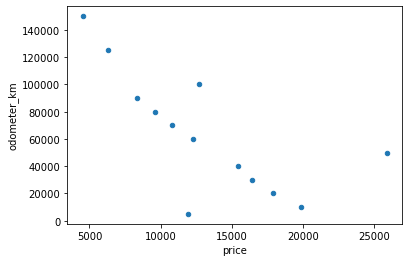

In [110]:
km_df.plot.scatter('price', 'odometer_km')

There appers to be a negative correlation. With higher prices meaning lower mileage.

Now, lets see how much cheaper cars are with damage than their non-damaged counterparts.

In [111]:
autos.head()

,date_crawled,name,model,description,price,abtest,vehicle_type,registration_year,gearbox,power_ps,...,odometer_km,registration_month,fuel_type,brand,unreparied_damage,ad_created,no_of_pictures,postal_code,last_seen,seller
0,2016-03-26 17:47:46,Peugeot,807,160_NAVTECH_ON_BOARD,5000.0,control,bus,2004,manual,158,...,150000.0,3,lpg,peugeot,nein,20160326,0,79588,2016-04-06 06:45:54,privat
1,2016-04-04 13:38:56,BMW,740i,4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatic,286,...,150000.0,6,benzin,bmw,nein,20160404,0,71034,2016-04-06 14:45:08,privat
2,2016-03-26 18:57:24,Volkswagen,Golf,1.6_United,8990.0,test,limousine,2009,manual,102,...,70000.0,7,benzin,volkswagen,nein,20160326,0,35394,2016-04-06 20:15:37,privat
3,2016-03-12 16:58:10,Smart,smart,fortwo_coupe_softouch/F1/Klima/Panorama,4350.0,control,kleinwagen,2007,automatic,71,...,70000.0,6,benzin,smart,nein,20160312,0,33729,2016-03-15 03:16:28,privat
4,2016-04-01 14:38:50,Ford,Focus,1_6_Benzin_TÜV_neu_ist_sehr_gepflegt.mit_Klima...,1350.0,test,kombi,2003,manual,0,...,150000.0,7,benzin,ford,nein,20160401,0,39218,2016-04-01 14:38:50,privat


In [113]:
autos['unreparied_damage'].unique()

array(['nein', nan, 'ja'], dtype=object)

Oops, looks like we'll first need to convert from German to English. We'll also fix the spelling error in the column title just for practice.

In [114]:
translate_damage = {'nein' : 'no', 'ja' : 'yes'}

autos['unreparied_damage'] = autos['unreparied_damage'].map(translate_damage)
autos['unreparied_damage'].unique()

array(['no', nan, 'yes'], dtype=object)

In [115]:
autos.columns

Index(['date_crawled', 'name', 'model', 'description', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps',
       'offer_type', 'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unreparied_damage', 'ad_created', 'no_of_pictures', 'postal_code',
       'last_seen', 'seller'],
      dtype='object')

In [116]:
autos.columns = ['date_crawled', 'name', 'model', 'description', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps',
       'offer_type', 'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'no_of_pictures', 'postal_code',
       'last_seen', 'seller']

In [117]:
autos['unrepaired_damage'].value_counts()

no     34255
yes     4785
Name: unrepaired_damage, dtype: int64

In [122]:
damage_response = autos['unrepaired_damage'].dropna().unique()

In [127]:
damage = dict()

for response in damage_response:
    
    mean = autos[autos['unrepaired_damage'] == response]['price'].mean()
    
    damage[response] = mean
    

for keys, values in damage.items():
    print("{:5} : ${:.2f}".format(keys.capitalize(), values))

No    : $8233.39
Yes   : $2335.38


From this we can see that the average price of a damaged car is significantly lower.

To be continued.....